# Математическая модель линейной регрессии:
## 𝑦 = 𝑎⋅𝑥+𝑏

𝑥 — номер месяца (время)

𝑦 — количество продаж

𝑎, 𝑏 - коэффициенты, которые мы найдем из данных (наклон и сдвиг)

# Импорт библиотек

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерация данных

In [ ]:
# Месяцы с 1 по 12
months = np.arange(1, 13).reshape(-1, 1)

# Продажи
sales = np.array([120, 135, 161, 155, 170, 200, 230, 210, 195, 185, 170, 160])

df = pd.DataFrame({'Month': months.flatten(), 'Sales': sales})
df

,Month,Sales
0,1,120
1,2,135
2,3,161
3,4,155
4,5,170
5,6,200
6,7,205
7,8,210
8,9,195
9,10,185


# Построение и обучение модели

In [31]:
model = LinearRegression()
model.fit(df[['Month']], df['Sales'])

# Коэффициенты
a = model.coef_[0]
b = model.intercept_
print(f"Модель: y = {a:.2f}x + {b:.2f}")

Модель: y = 4.36x + 143.80


# Прогноз на будущие месяцы

In [32]:
# Предсказание спроса на следующие 6 месяцев
future_months = np.arange(13, 19).reshape(-1, 1)
future_sales = model.predict(future_months)

future_df = pd.DataFrame({'Month': future_months.flatten(), 'Predicted Sales': future_sales.astype(int)})
future_df


c:\Users\Christina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Month,Predicted Sales
0,13,200
1,14,204
2,15,209
3,16,213
4,17,217
5,18,222


# Визуализация

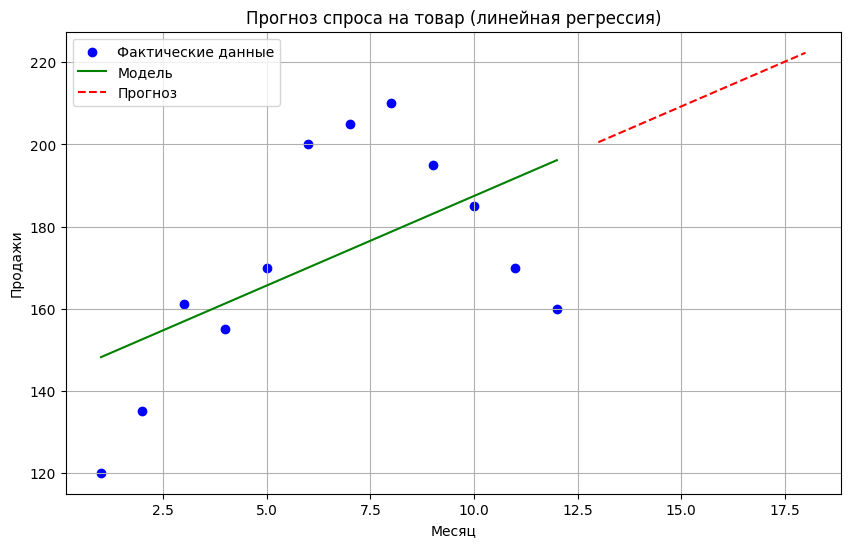

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Month'], df['Sales'], label='Фактические данные', color='blue')
plt.plot(df['Month'], model.predict(df[['Month']]), label='Модель', color='green')
plt.plot(future_months, future_sales, 'r--', label='Прогноз')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.title('Прогноз спроса на товар (линейная регрессия)')
plt.legend()
plt.grid(True)
plt.show()